In [92]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import numpy as np
%matplotlib inline
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [93]:
df = pd.read_csv("datasets/dataset_final.csv")

C:\Users\Micha\AppData\Local\Temp\ipykernel_33560\2107233202.py:1: DtypeWarning: Columns (2,3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/dataset_final.csv")


In [94]:
df.shape

(843836, 36)

In [95]:
df.dtypes

id                       object
name                     object
album                    object
album_id                 object
time_signature           object
release_date             object
track_genre              object
primary_artist           object
secondary_artists        object
primary_artist_id        object
secondary_artist_ids     object
decade                    int64
danceability            float64
energy                  float64
key                     float64
loudness                float64
mode                    float64
speechiness             float64
acousticness            float64
instrumentalness        float64
liveness                float64
valence                 float64
tempo                   float64
duration_ms             float64
year                    float64
C1                      float64
C2                      float64
C3                      float64
C4                      float64
C5                      float64
C6                      float64
C7      

In [96]:
df.dropna(subset=['primary_artist','primary_artist_id'], inplace=True)

In [97]:
df = df_2.iloc[:,:24]

In [98]:
# df.to_csv("dataset_final.csv", index=False)

In [99]:
df.shape

(843836, 24)

In [100]:
df.isnull().sum()

id                           0
name                         0
album                    44260
album_id                 44260
time_signature               0
release_date                 0
track_genre             716183
primary_artist               0
secondary_artists       692555
primary_artist_id            0
secondary_artist_ids    704373
decade                       0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
duration_ms                  0
dtype: int64

In [101]:
# df.select_dtypes([np.number])

In [102]:
X = df.select_dtypes([np.number]).iloc[:,1:]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca_test = PCA()
pca_test.fit(X_std)
pca_test.explained_variance_ratio_

array([0.27089508, 0.11678833, 0.09963867, 0.09486216, 0.07861685,
       0.07283619, 0.07038331, 0.06386735, 0.06173256, 0.03397602,
       0.02640776, 0.00999574])

Text(0, 0.5, 'Cumulative Explained Variance')

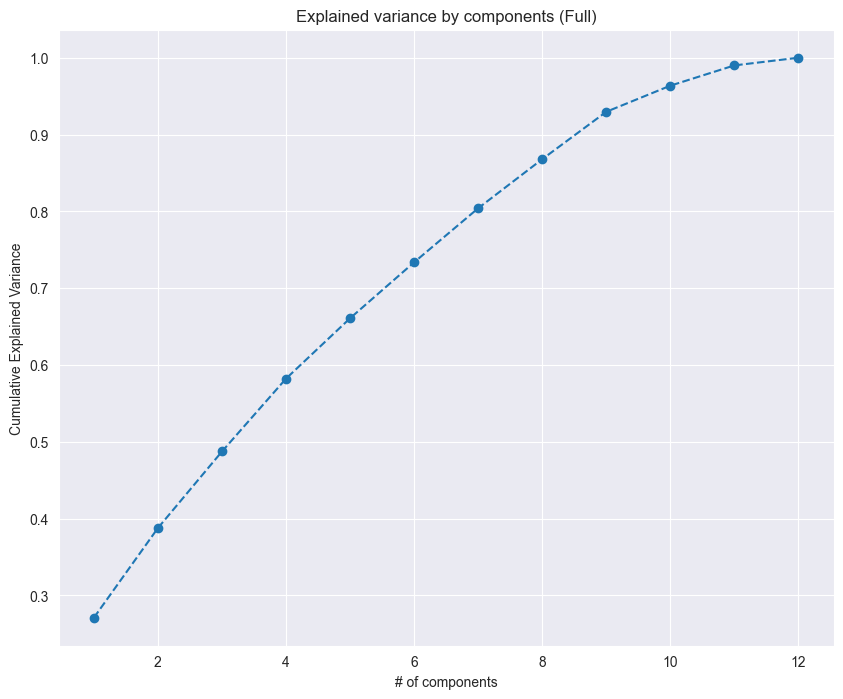

In [103]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,13), pca_test.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components (Full)')
plt.xlabel('# of components')
plt.ylabel('Cumulative Explained Variance')

In [104]:
PCA_COMPONENTS = 11

In [105]:
pca_test = PCA(n_components=PCA_COMPONENTS)
pca_test.fit(X_std)
X_pca = pca_test.transform(X_std)
print(X_pca)

[[ 2.05132094 -0.6906443   0.19195531 ...  0.01588369 -0.08200536
  -0.13638427]
 [ 2.11901467  0.0534019   0.75870858 ...  1.44192713 -0.02149797
  -0.07948419]
 [ 2.02254908 -0.68026078  1.4381496  ...  2.65524488 -1.09468842
   0.17464482]
 ...
 [ 0.76822305  0.06199486 -0.53583631 ...  0.19868217  0.07325821
   0.00363706]
 [ 0.79716655  1.04678038 -0.45204767 ...  0.90701742 -0.1025238
  -0.45299262]
 [ 2.0778942   0.79503801 -0.84911496 ...  0.28606361  0.15361741
  -0.02562326]]


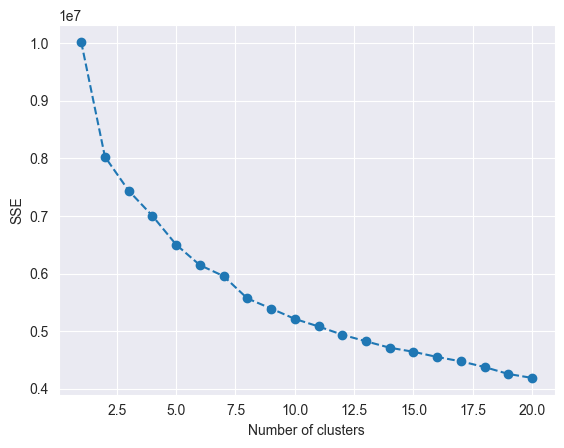

In [106]:
res = {}
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, random_state=46)
    kmeans_pca.fit(X_pca)
    res[k] = kmeans_pca.inertia_  # Plotting the curve with 'k'-value vs SSE
plt.plot(list(res.keys()), list(res.values()), linestyle="--", marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [107]:
CLUSTER_COUNT = 10

In [108]:
kmeans_pca = KMeans(n_clusters=CLUSTER_COUNT, random_state=46)

In [109]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=10, random_state=46)

In [110]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
df_pca_kmeans.columns.values[-11:] = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11']
df_pca_kmeans["cluster_label"] = kmeans_pca.labels_
df_pca_kmeans.columns.values

array(['id', 'name', 'album', 'album_id', 'time_signature',
       'release_date', 'track_genre', 'primary_artist',
       'secondary_artists', 'primary_artist_id', 'secondary_artist_ids',
       'decade', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'cluster_label'],
      dtype=object)

In [111]:
df_pca_kmeans.head()

,id,name,album,album_id,time_signature,release_date,track_genre,primary_artist,secondary_artists,primary_artist_id,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,cluster_label
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.191955,0.728250,0.240858,-1.201802,0.061327,0.206841,0.015884,-0.082005,-0.136384,1
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.758709,-0.361014,-0.139901,-1.333206,0.556114,-0.139336,1.441927,-0.021498,-0.079484,1
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,1.438150,1.348731,0.339757,0.657477,1.052282,-1.684486,2.655245,-1.094688,0.174645,3
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,2.031454,-1.205164,-0.242581,-0.584256,-0.359769,-0.717999,0.858360,-1.100132,0.200203,0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,-1.270599,0.437615,-0.110363,-0.076077,-0.544616,-0.473572,0.621576,-0.590572,-0.269635,9


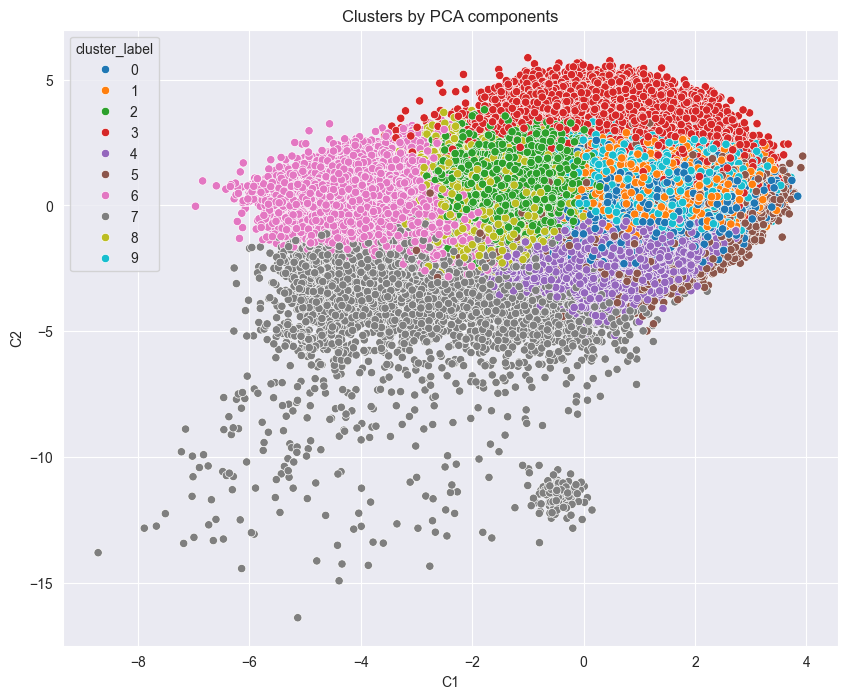

In [114]:
x_axis = df_pca_kmeans['C1']
y_axis = df_pca_kmeans['C2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans["cluster_label"], palette="tab10")
plt.title('Clusters by PCA components')
plt.show()

In [115]:
df_pca_kmeans['cluster_label'] = df_pca_kmeans['cluster_label'].apply(lambda x: f"CLSTR{x}")

In [116]:
df_pca_kmeans['cluster_label'] 

0         CLSTR1
1         CLSTR1
2         CLSTR3
3         CLSTR0
4         CLSTR9
           ...  
843831    CLSTR2
843832    CLSTR2
843833    CLSTR1
843834    CLSTR9
843835    CLSTR1
Name: cluster_label, Length: 843836, dtype: object

In [117]:
df_pca_kmeans.cluster_label.value_counts()

cluster_label
CLSTR2    133997
CLSTR0    132619
CLSTR1    118131
CLSTR9    110303
CLSTR4    102238
CLSTR6     92664
CLSTR8     78897
CLSTR5     40243
CLSTR3     21055
CLSTR7     13689
Name: count, dtype: int64

In [118]:
df_pca_kmeans.to_csv("dataset_ultimate", index=False)

# Dataset that has valid genres only

In [120]:
df_2 = df.dropna(subset=['track_genre'])

In [121]:
df_2.shape

(127653, 24)

In [52]:
# df[df['name'].str.contains("CLSTR")]

CLUSTERING REDUCED DATASET

In [122]:
X = df_2.select_dtypes([np.number])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca_test = PCA()
pca_test.fit(X_std)
pca_test.explained_variance_ratio_

array([0.27984513, 0.10788365, 0.09299469, 0.08641391, 0.07442982,
       0.07121519, 0.0664587 , 0.06232502, 0.05472019, 0.05108248,
       0.02626317, 0.01939814, 0.00696991])

Text(0, 0.5, 'Cumulative Explained Variance')

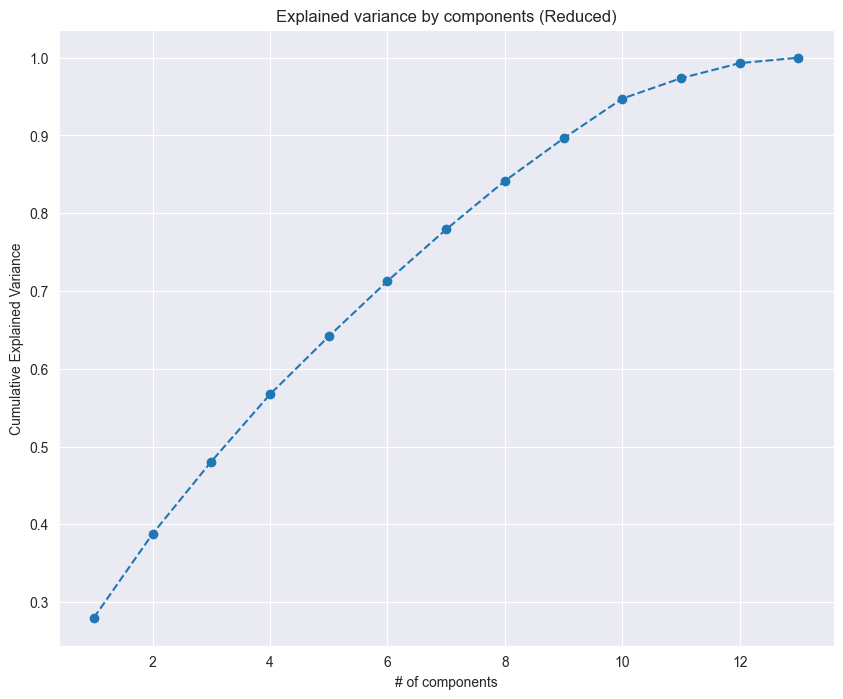

In [123]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,14), pca_test.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components (Reduced)')
plt.xlabel('# of components')
plt.ylabel('Cumulative Explained Variance')

Will be using 11 components for PCA

In [124]:
PCA_COMPONENTS = 11

In [125]:
pca_test = PCA(n_components=PCA_COMPONENTS)
pca_test.fit(X_std)
X_pca = pca_test.transform(X_std)
print(X_pca)

[[ 2.08150606  0.24669186  0.32058346 ...  0.1675282   0.29024128
   0.04769094]
 [ 2.20209787 -0.12133278  0.57183659 ... -0.44743158  1.30635108
  -0.08597597]
 [ 2.18044186  0.99260602  1.96537762 ... -2.17383171  2.46176831
   0.87273234]
 ...
 [ 0.01465999  0.57481283 -0.38755587 ... -0.89543658 -0.75280211
  -0.36360403]
 [ 1.22562245  0.04946713  0.37889776 ... -0.93204408  0.10455478
   0.26298467]
 [ 2.34360202 -0.29329518 -0.83272387 ...  0.0930629  -0.51378534
   0.06743469]]


Finding ideal cluster amount in kmeans

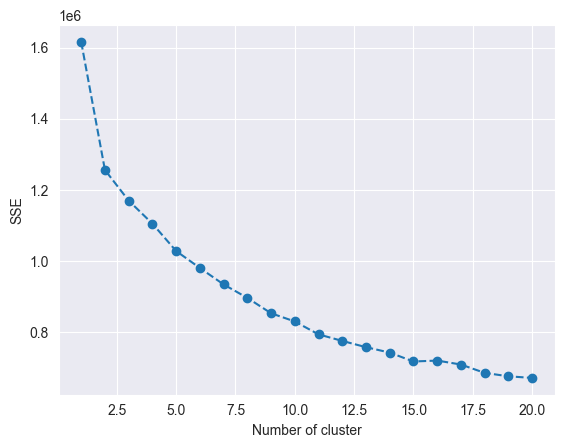

In [126]:
res = {} 
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, random_state=46)
    kmeans_pca.fit(X_pca)
    res[k] = kmeans_pca.inertia_  # Plotting the curve with 'k'-value vs SSE
plt.plot(list(res.keys()), list(res.values()), linestyle='--', marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Will be using 3 clusters for Kmeans

In [127]:
CLUSTER_COUNT = 10

In [128]:
kmeans_pca = KMeans(n_clusters=CLUSTER_COUNT, random_state=46)

In [129]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=10, random_state=46)

In [131]:
df_pca_kmeans = pd.concat([df_2.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)
df_pca_kmeans.columns.values[-11:] = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11']
df_pca_kmeans["cluster_label"] = kmeans_pca.labels_
df_pca_kmeans.columns.values

array(['id', 'name', 'album', 'album_id', 'time_signature',
       'release_date', 'track_genre', 'primary_artist',
       'secondary_artists', 'primary_artist_id', 'secondary_artist_ids',
       'decade', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'cluster_label'],
      dtype=object)

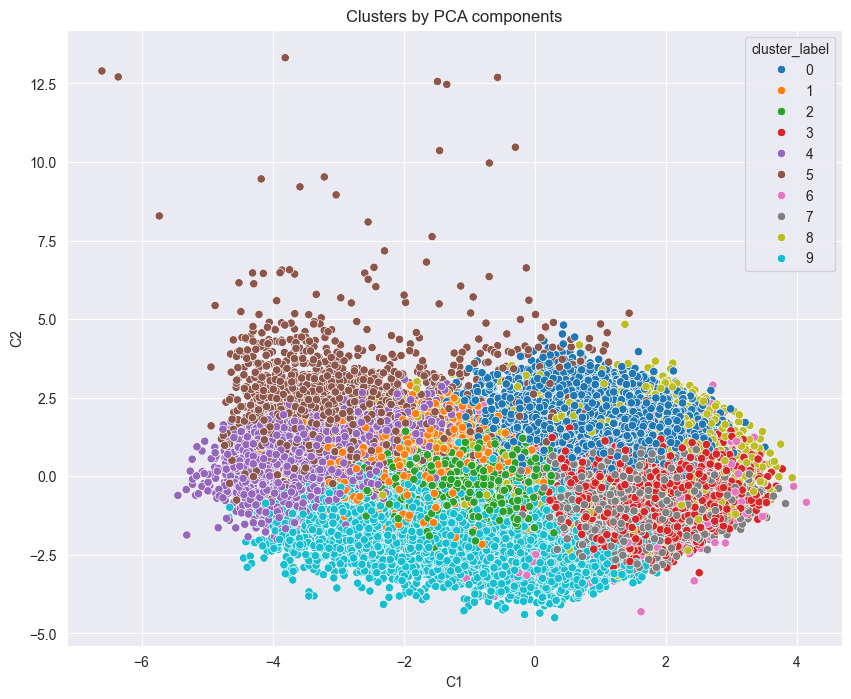

In [132]:
x_axis = df_pca_kmeans['C1']
y_axis = df_pca_kmeans['C2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans["cluster_label"], palette="tab10")
plt.title('Clusters by PCA components')
plt.show()

In [133]:
df_pca_kmeans['cluster_label'] = df_pca_kmeans['cluster_label'].apply(lambda x: f"CLSTR{x}")

In [134]:
df_pca_kmeans.cluster_label.value_counts()

cluster_label
CLSTR3    23534
CLSTR0    19771
CLSTR7    19424
CLSTR2    16723
CLSTR4    14582
CLSTR1    11853
CLSTR9    10187
CLSTR8     6026
CLSTR5     3709
CLSTR6     1844
Name: count, dtype: int64

In [135]:
df_pca_kmeans.head()

,id,name,album,album_id,time_signature,release_date,track_genre,primary_artist,secondary_artists,primary_artist_id,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,cluster_label
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.320583,-0.535261,-0.920101,0.237075,0.902308,-0.631091,0.167528,0.290241,0.047691,CLSTR0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,0.571837,0.682354,-0.408539,-0.048957,1.542399,0.309202,-0.447432,1.306351,-0.085976,CLSTR3
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,1.965378,-0.750248,-0.278685,0.209081,0.053086,1.771965,-2.173832,2.461768,0.872732,CLSTR0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,1.289724,1.970642,-0.382296,-0.401075,0.277871,-0.309739,-0.860085,1.272194,0.888663,CLSTR3
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,4.0tsig,1999-11-02,metal,Rage Against The Machine,NaN,2d0hyoQ5ynDBnkvAbJKORj,...,-1.018952,-0.972085,0.002676,0.016948,-0.084793,-0.561757,-0.479917,0.950891,0.454568,CLSTR7


In [136]:
df_pca_kmeans.to_csv("dataset_ultimate_reduced", index=False)